# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Viskoelastický nosník

## Zadání
Prutová konstrukce na obrázku je vyrobena z betonu, který budeme v tomto příkladu považovat za lineárně viskoelastický materiál se stárnutím. Nosníky mají po délce konstantní průřez charakterizovaný momentem setrvačnosti $I$.    

V čase (tj. stáří betonu) 30 dní byla konstrukce zatížena svislou silou $F$.
Za 20 dní, tj. celkem 50 dní od vybetonování, došlo ke svislému posunu levé podpory o $\overline{w}$ směrem dolů (viz obrázek).
Ve stáří 100 dní došlo současně k odtížení i rektifikaci levé podpory o $\overline{w}$ směrem nahoru (síla $F$ a svislý posun $w_1$ mají tedy od této chvíle nulovou velikost).
    
Vyjádřete svislý posun styčníku 2 a momentovou reakci v levém vetknutí (styčník 1) v časech 40 dní, 60 dní a 200 dní po vybetonování.
Výpočet proveďte obecně (bez dosazování konkrétních hodnot).
Výsledek vyjádřete pomocí symbolů $L$, $I$, $F$, $\overline{w}$ a pomocí funkce poddajnosti $J(t,t')$, případně relaxační funkce $R(t,t')$.

Jak by se změnil zápis obou veličin pro čas 200 dní po vybetonování, kdybychom beton považovali za materiál bez stárnutí?



Import potřebných knihoven

In [1]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches


<ipython-input-2-a0d14bfacc9e>:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([-0.15, 0.15], [-0.7, -0.7], 'k-', linewidth=2, color='grey')


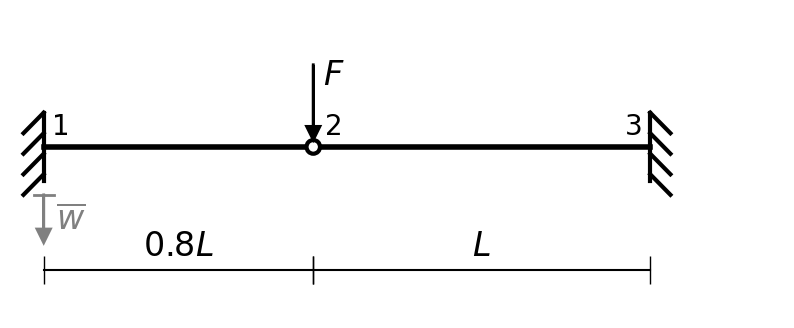

In [2]:
# Tato buňka slouží pouze pro vykreslení zadaného nosníku a nijak nesouvisí s řešením příkladu
# Picture
fig, ax = plt.subplots(figsize=(10, 4))

# Beam - nodes
x1, y1 = 0, 0
x2, y2 = 4, 0
x3, y3 = 9, 0

# Beam - lines
ax.plot([x1, x2 - 0.15], [y1, y2], 'k-', linewidth=4)  # První část nosníku
ax.plot([x2 + 0.15, x3], [y2, y3], 'k-', linewidth=4)  # Druhá část nosníku

# Support 1
# nodes
x11, y11 = 0, 0.5
x12, y12 = 0, -0.5
x13, y13 = -0.3, 0.2
x14, y14 = 0, 0.2
x15, y15 = -0.3, -0.1
x16, y16 = 0, -0.1
x17, y17 = -0.3, -0.4
x18, y18 = 0, -0.4
x19, y19 = -0.3, -0.7
# lines
ax.plot([x11, x12], [y11, y12], 'k-', linewidth=3)
ax.plot([x13, x11], [y13, y11], 'k-', linewidth=3)
ax.plot([x15, x14], [y15, y14], 'k-', linewidth=3)
ax.plot([x17, x16], [y17, y16], 'k-', linewidth=3)
ax.plot([x19, x18], [y19, y18], 'k-', linewidth=3)
# label
ax.text(x1 + 0.25, y1 + 0.5, "1", ha='center', va='top', fontsize=20)

# Support 3
# nodes
x31, y31 = 9, 0.5
x32, y32 = 9, -0.5
x33, y33 = 9.3, 0.2
x34, y34 = 9, 0.2
x35, y35 = 9.3, -0.1
x36, y36 = 9, -0.1
x37, y37 = 9.3, -0.4
x38, y38 = 9, -0.4
x39, y39 = 9.3, -0.7
# lines
ax.plot([x31, x32], [y31, y32], 'k-', linewidth=3)
ax.plot([x33, x31], [y33, y31], 'k-', linewidth=3)
ax.plot([x35, x34], [y35, y34], 'k-', linewidth=3)
ax.plot([x37, x36], [y37, y36], 'k-', linewidth=3)
ax.plot([x39, x38], [y39, y38], 'k-', linewidth=3)
# label
ax.text(x3 - 0.25, y3 + 0.5, "3", ha='center', va='top', fontsize=20)

# Support 2
circle = patches.Circle((4, 0), 0.1, edgecolor='black', fill=False, linewidth=3)  # empty circle
ax.add_patch(circle)
# label
ax.text(x2 + 0.3, y2 + 0.5, "2", ha='center', va='top', fontsize=20)

# force F
ax.arrow(4, 1.2, 0, -0.9, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.text(4.3, 0.8, "$F$", ha='center', va='bottom', fontsize=24)

# support displacement
ax.arrow(0, -0.7, 0, -0.5, head_width=0.2, head_length=0.2, fc='grey', ec='grey', linewidth=2)
ax.plot([-0.15, 0.15], [-0.7, -0.7], 'k-', linewidth=2, color='grey')
ax.text(0.4, -1.3, r"$\overline{w}$", ha='center', va='bottom', fontsize=24, color='grey')

# Dimension lines
# part 12
ax.plot([x1, x2], [-1.8, -1.8], 'k-', marker='|', markersize=20)
ax.text(x2/2, -1.7, r"$0.8 L$", ha='center', va='bottom', fontsize=24)

# part 23
ax.plot([x2, x3], [-1.8, -1.8], 'k-', marker='|', markersize=20)
ax.text((x2 + x3)/2, -1.7, "$L$", ha='center', va='bottom', fontsize=24)

# Set limits and hide axes
ax.set_xlim(-0.5, 11)
ax.set_ylim(-2.5, 2)
ax.axis('off')

# Show plot
plt.show()

## Řešení

### Analytické řešení

**Definice proměnných**

In [3]:
t = smp.symbols('t', real = True, positive = True)
tt = smp.symbols('tt', real = True, positive = True)

I = smp.symbols('I', real = True, positive = True)
E = smp.symbols('E', real = True, positive = True)

L = smp.symbols('L', real = True, positive = True)

L12 = smp.Rational(8, 10) * L  # 0.8 jako zlomek
L23 = smp.Rational(1, 1) * L   # 1 jako zlomek

F = smp.symbols('F', real = True, positive = True)
w = smp.symbols(r'\overline{w}', real = True, positive = True)
w2 = smp.symbols(r'w_2', real = True, positive = True)
w22 = smp.symbols(r'w_22', real = True, positive = True)

J = smp.symbols(r'J(t,tt)', real = True, positive = True)
R = smp.symbols(r'R(t,tt)', real = True, positive = True)

J_40_30 = smp.symbols(r'J(40,30)', real = True, positive = True)


**Řešení podle pružnosti**

Pro řešení použijeme například deformační metodu. Pro daný nosník bude jedinou deformační neznámou svislý posun styčníku 2.

Hodnoty koncových sil a momentů určíme z tabulek deformační metody.

Řešit budeme pro lepší přehlednost samostatně pro účinky od zatížení silou $F$ a od poklesu podpory $\overline w$.

*Během řešení si všímejte, které veličiny a od kterých účinků jsou či nejsou závislé na tuhosti $E$.*

**Výpočet pro zatížení silou $F$**

Podmínka rovnováhy sil ve styčníku 2 pro účinky od silového zatížení

$Z_{21}^F + Z_{23}^F - F = 0$

In [4]:
# z tabulek DM
Z_21_F = 3 * E * I / L12**2 * w2 / L12
Z_23_F = 3 * E * I / L23**2 * w2 / L23

# podm. rovnováhy
podm2_F = Z_21_F + Z_23_F - F

# výpočet průhybu styčníku 2 z podm. rovnováhy
w2_F = smp.solve(podm2_F, w2)
w2_F = [smp.nsimplify(sol) for sol in w2_F]

print(f"Průhyb styčníku od zatížení silou F:")
display(smp.Eq(smp.symbols(r'w_{2}^F'), w2_F[0]))


Průhyb styčníku od zatížení silou F:


Eq(w_{2}^F, 64*F*L**3/(567*E*I))

Momentovou reakci dopočteme ze známé koncové síly $Z_{21}$, případně lze použít opět tabulku DM.

In [5]:
Z_21_F = Z_21_F.subs(w2, w2_F[0])
Z_23_F = Z_23_F.subs(w2, w2_F[0])

R_M1_F = Z_21_F * L12
R_M2_F = Z_23_F * L23

# Výstupy
print(f"Z_21_F: {Z_21_F}")
print(f"Z_23_F: {Z_23_F}")
print(f"R_M1_F: {R_M1_F}")
print(f"R_M2_F: {R_M2_F}")

print(f"Momentová reakce v levé podpoře od zatížení silou F:")

display(smp.Eq(smp.symbols(r'R_{M1}^F'), R_M1_F))


Z_21_F: 125*F/189
Z_23_F: 64*F/189
R_M1_F: 100*F*L/189
R_M2_F: 64*F*L/189
Momentová reakce v levé podpoře od zatížení silou F:


Eq(R_{M1}^F, 100*F*L/189)

**Výpočet pro předepsaný pokles $\overline w$**

Podmínka rovnováhy sil ve styčníku 2

$Z_{21}^w + Z_{23}^w = 0$

In [6]:
# z tabulek DM
Z_21_w = 3 * E * I / L12**2 * (w2 - w) / L12
Z_23_w = 3 * E * I / L23**2 * w2 / L23

# podm. rovnováhy
podm2_w = Z_21_w + Z_23_w

# výpočet průhybu styčníku 2 z podm. rovnováhy
w2_w = smp.solve(podm2_w, w2)
w2_w = [smp.nsimplify(sol) for sol in w2_w]

print(f"Průhyb styčníku od poklesu podpory:")
display(smp.Eq(smp.symbols(r'w_{2}^w'), w2_w[0]))


Průhyb styčníku od poklesu podpory:


Eq(w_{2}^w, 125*\overline{w}/189)

In [7]:
Z_21_w = Z_21_w.subs(w2, w2_w[0])
Z_23_w = Z_23_w.subs(w2, w2_w[0])

R_M1_w = Z_21_w * L12
R_M2_w = Z_23_w * L23

# Výstupy
print(f"Z_21_w: {Z_21_w}")
print(f"Z_23_w: {Z_23_w}")
print(f"R_M1_w: {R_M1_w}")
print(f"R_M2_w: {R_M2_w}")

print(f"Momentová reakce v levé podpoře od předepsaného poklesu levé podpory:")

display(smp.Eq(smp.symbols(r'R_{M1}^w'), R_M1_w))


Z_21_w: -125*E*I*\overline{w}/(63*L**3)
Z_23_w: 125*E*I*\overline{w}/(63*L**3)
R_M1_w: -100*E*I*\overline{w}/(63*L**2)
R_M2_w: 125*E*I*\overline{w}/(63*L**2)
Momentová reakce v levé podpoře od předepsaného poklesu levé podpory:


Eq(R_{M1}^w, -100*E*I*\overline{w}/(63*L**2))

Superpozicí obou příspěvků získáme celkové řešení podle pružnosti.

In [8]:
w2_celk = w2_w[0] + w2_F[0]
print(f"Svislý posun styčníku - pružné řešení:")
display(smp.Eq(smp.symbols(r'w_{2}'), w2_celk))

R_M1 = R_M1_F + R_M1_w
print(f"Momentová reakce v levé podpoře - pružné řešení:")
display(smp.Eq(smp.symbols(r'R_{M1}'), R_M1))


Svislý posun styčníku - pružné řešení:


Eq(w_{2}, 125*\overline{w}/189 + 64*F*L**3/(567*E*I))

Momentová reakce v levé podpoře - pružné řešení:


Eq(R_{M1}, -100*E*I*\overline{w}/(63*L**2) + 100*F*L/189)

**Viskoelastické řešení**

Při řešení podle viskoelasticity je potřeba na složky, jejichž hodnota je úměrná poddajnosti $1/E$, resp. modulu pružnosti $E$, aplikovat operátor poddajnosti resp. relaxační operátor.
V praxi to znamená, že ve vztazích nahradíme poddajnost $1/E$ funkcí poddajnosti $J(t,t')$ a modul pružnosti $E$ relaxační funkcí $R(t,t')$.

Jelikož se jedná o materiál se stárnutím, funkce poddajnosti i relaxační funkce budou záviset nejen na čase $t$ pro který je vyhodnocení prováděno, ale i na stáří betonu v okamžiku vnesení zatížení $t'$.
Odtížení a rektifikaci je při viskoelastickém výpočtu nutné uvažovat jako nové zatěžovací stavy. Od času $t = 100$ dní začne na styčník 2 působit síla o velikosti $-F$ (tedy síla stejné velikosti působící opačným směrem) a dojde k posunu styčníku o $\overline w$ směrem nahoru.

- pro čas $t = 40$ dní: (pouze síla $F$)

\begin{align}
& w_2(40) = \frac{64 \,FL^3}{567 \, I} \cdot J(40,30)\\
& R_{M1}(40) = \frac{100 \ FL}{189}
\end{align}


- pro čas $t = 60$ dní: (síla $F$ i pokles $\overline w$)

\begin{align}
& w_2(60) = \frac{64 \,FL^3}{567 \, I} \cdot J(60,30) + \frac{125 \ \overline w}{189}\\
& R_{M1}(60) = \frac{100 \ FL}{189} - \frac{100 \,I\,\overline w}{63 \, L} \cdot R(60,50)
\end{align}


- pro čas $t = 200$ dní: (síla $F$, pokles $\overline w$, odtížení a rektifikace poklesu $\overline w$)

\begin{align}
& w_2(200) = \frac{64 \,FL^3}{567 \, I} \cdot \left[ J(200,30) - J(200,100)\right]\\
& R_{M1}(100) =  - \frac{100 \,I\,\overline w}{63 \, L} \cdot \left[R(200,50) - R(200,100) \right]
\end{align}


**Materiál bez stárnutí**

V případě materiálu, jehož vlastnosti se během stárnutí nemění, jsou funkce poddajnosti i relaxační funkce závislé pouze na délce trvání zatížení.

- pro čas $t = 200$ dní bez stárnutí:

\begin{align}
& w_2(200) = \frac{64 \,FL^3}{567 \, I} \cdot \left[ J(170) - J(100)\right]\\
& R_{M1}(100) = - \frac{100 \,I\,\overline w}{63 \, L} \cdot \left[R(150) - R(100) \right]
\end{align}
